# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


In [3]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

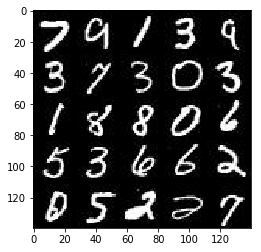

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

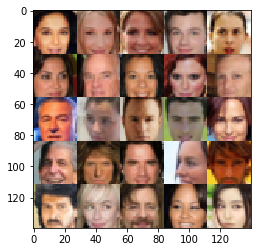

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, shape=(), name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
# TODO: Add additional layers to this, since this probably doesn't work very well.

In [9]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*1024)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 1024))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 512, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode, print_every=10, show_every=100, figsize=(5,5)):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    tf.reset_default_graph()
 
    input_real, input_z, learning_rate_tensor = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z,
                                data_shape[3])
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate_tensor, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, 100))

    samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate_tensor: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learning_rate_tensor: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images, learning_rate_tensor: learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, learning_rate_tensor: learning_rate})

                    print("Epoch {}/{} Batch# {}...".format(epoch_i+1, epoch_count, steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)

        saver.save(sess, './checkpoints/generator.ckpt')

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    return losses, samples    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 Batch# 10... Discriminator Loss: 0.0037... Generator Loss: 7.0198
Epoch 1/2 Batch# 20... Discriminator Loss: 0.0003... Generator Loss: 9.1868
Epoch 1/2 Batch# 30... Discriminator Loss: 0.0028... Generator Loss: 24.6064
Epoch 1/2 Batch# 40... Discriminator Loss: 0.0064... Generator Loss: 6.9631
Epoch 1/2 Batch# 50... Discriminator Loss: 0.0002... Generator Loss: 12.1495
Epoch 1/2 Batch# 60... Discriminator Loss: 0.0002... Generator Loss: 23.4082
Epoch 1/2 Batch# 70... Discriminator Loss: 0.3372... Generator Loss: 4.2030
Epoch 1/2 Batch# 80... Discriminator Loss: 3.8080... Generator Loss: 0.7764
Epoch 1/2 Batch# 90... Discriminator Loss: 0.5706... Generator Loss: 3.9934
Epoch 1/2 Batch# 100... Discriminator Loss: 0.9147... Generator Loss: 2.7442


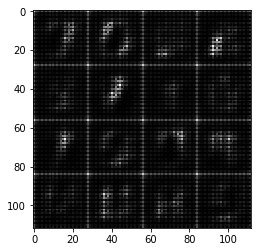

Epoch 1/2 Batch# 110... Discriminator Loss: 0.3077... Generator Loss: 2.4238
Epoch 1/2 Batch# 120... Discriminator Loss: 0.2992... Generator Loss: 4.5115
Epoch 1/2 Batch# 130... Discriminator Loss: 0.3757... Generator Loss: 2.2104
Epoch 1/2 Batch# 140... Discriminator Loss: 0.4105... Generator Loss: 1.5577
Epoch 1/2 Batch# 150... Discriminator Loss: 0.1318... Generator Loss: 2.9418
Epoch 1/2 Batch# 160... Discriminator Loss: 0.1731... Generator Loss: 3.5082
Epoch 1/2 Batch# 170... Discriminator Loss: 1.3700... Generator Loss: 0.6255
Epoch 1/2 Batch# 180... Discriminator Loss: 0.2787... Generator Loss: 2.1709
Epoch 1/2 Batch# 190... Discriminator Loss: 0.1424... Generator Loss: 2.7327
Epoch 1/2 Batch# 200... Discriminator Loss: 0.1283... Generator Loss: 2.7671


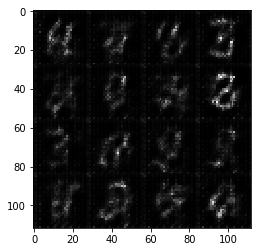

Epoch 1/2 Batch# 210... Discriminator Loss: 0.0929... Generator Loss: 3.1098
Epoch 1/2 Batch# 220... Discriminator Loss: 0.0561... Generator Loss: 4.1281
Epoch 1/2 Batch# 230... Discriminator Loss: 0.1636... Generator Loss: 2.2762
Epoch 1/2 Batch# 240... Discriminator Loss: 0.0556... Generator Loss: 4.1060
Epoch 1/2 Batch# 250... Discriminator Loss: 2.7222... Generator Loss: 0.1244
Epoch 1/2 Batch# 260... Discriminator Loss: 0.1544... Generator Loss: 3.0345
Epoch 1/2 Batch# 270... Discriminator Loss: 0.7292... Generator Loss: 6.7570
Epoch 1/2 Batch# 280... Discriminator Loss: 0.2459... Generator Loss: 1.9018
Epoch 1/2 Batch# 290... Discriminator Loss: 0.0107... Generator Loss: 8.5868
Epoch 1/2 Batch# 300... Discriminator Loss: 0.4489... Generator Loss: 1.3402


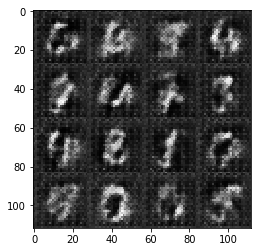

Epoch 1/2 Batch# 310... Discriminator Loss: 0.0092... Generator Loss: 5.6344
Epoch 1/2 Batch# 320... Discriminator Loss: 2.2125... Generator Loss: 2.4586
Epoch 1/2 Batch# 330... Discriminator Loss: 0.1022... Generator Loss: 3.1870
Epoch 1/2 Batch# 340... Discriminator Loss: 0.0276... Generator Loss: 6.3728
Epoch 1/2 Batch# 350... Discriminator Loss: 0.0368... Generator Loss: 6.0759
Epoch 1/2 Batch# 360... Discriminator Loss: 0.6326... Generator Loss: 0.9663
Epoch 1/2 Batch# 370... Discriminator Loss: 0.3762... Generator Loss: 1.6036
Epoch 1/2 Batch# 380... Discriminator Loss: 0.0481... Generator Loss: 5.2519
Epoch 1/2 Batch# 390... Discriminator Loss: 1.2647... Generator Loss: 0.7171
Epoch 1/2 Batch# 400... Discriminator Loss: 0.2046... Generator Loss: 2.2661


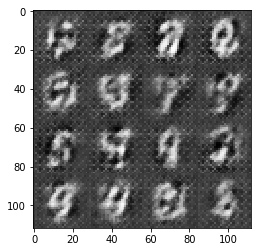

Epoch 1/2 Batch# 410... Discriminator Loss: 0.0127... Generator Loss: 6.8072
Epoch 1/2 Batch# 420... Discriminator Loss: 0.2380... Generator Loss: 7.3475
Epoch 1/2 Batch# 430... Discriminator Loss: 0.0821... Generator Loss: 3.2788
Epoch 1/2 Batch# 440... Discriminator Loss: 0.8331... Generator Loss: 0.7662
Epoch 1/2 Batch# 450... Discriminator Loss: 0.0637... Generator Loss: 18.7581
Epoch 1/2 Batch# 460... Discriminator Loss: 1.5603... Generator Loss: 0.3035
Epoch 1/2 Batch# 470... Discriminator Loss: 0.1775... Generator Loss: 3.4299
Epoch 1/2 Batch# 480... Discriminator Loss: 0.0627... Generator Loss: 4.8631
Epoch 1/2 Batch# 490... Discriminator Loss: 1.7698... Generator Loss: 0.2666
Epoch 1/2 Batch# 500... Discriminator Loss: 0.1161... Generator Loss: 3.2232


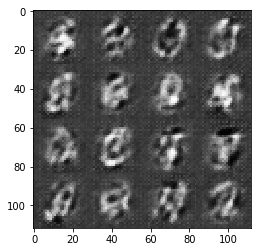

Epoch 1/2 Batch# 510... Discriminator Loss: 3.4207... Generator Loss: 14.1433
Epoch 1/2 Batch# 520... Discriminator Loss: 0.0857... Generator Loss: 3.9245
Epoch 1/2 Batch# 530... Discriminator Loss: 0.1748... Generator Loss: 5.4754
Epoch 1/2 Batch# 540... Discriminator Loss: 0.0272... Generator Loss: 7.5123
Epoch 1/2 Batch# 550... Discriminator Loss: 0.0380... Generator Loss: 11.0598
Epoch 1/2 Batch# 560... Discriminator Loss: 0.0484... Generator Loss: 6.2591
Epoch 1/2 Batch# 570... Discriminator Loss: 0.1150... Generator Loss: 10.8693
Epoch 1/2 Batch# 580... Discriminator Loss: 0.0074... Generator Loss: 11.6865
Epoch 1/2 Batch# 590... Discriminator Loss: 0.0270... Generator Loss: 6.3445
Epoch 1/2 Batch# 600... Discriminator Loss: 0.3063... Generator Loss: 1.7151


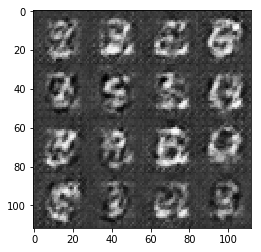

Epoch 1/2 Batch# 610... Discriminator Loss: 0.0078... Generator Loss: 8.4728
Epoch 1/2 Batch# 620... Discriminator Loss: 0.0169... Generator Loss: 7.4304
Epoch 1/2 Batch# 630... Discriminator Loss: 0.0154... Generator Loss: 5.1474
Epoch 1/2 Batch# 640... Discriminator Loss: 0.0879... Generator Loss: 3.1754
Epoch 1/2 Batch# 650... Discriminator Loss: 0.0123... Generator Loss: 13.5502
Epoch 1/2 Batch# 660... Discriminator Loss: 0.0060... Generator Loss: 10.1708
Epoch 1/2 Batch# 670... Discriminator Loss: 0.0543... Generator Loss: 5.5339
Epoch 1/2 Batch# 680... Discriminator Loss: 0.1581... Generator Loss: 2.7838
Epoch 1/2 Batch# 690... Discriminator Loss: 0.0971... Generator Loss: 3.4607
Epoch 1/2 Batch# 700... Discriminator Loss: 0.0091... Generator Loss: 7.7691


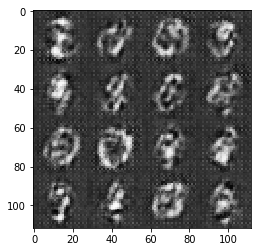

Epoch 1/2 Batch# 710... Discriminator Loss: 0.3703... Generator Loss: 1.3969
Epoch 1/2 Batch# 720... Discriminator Loss: 0.0126... Generator Loss: 11.1336
Epoch 1/2 Batch# 730... Discriminator Loss: 0.0842... Generator Loss: 4.8105
Epoch 1/2 Batch# 740... Discriminator Loss: 0.0081... Generator Loss: 5.5782
Epoch 1/2 Batch# 750... Discriminator Loss: 0.0198... Generator Loss: 6.4712
Epoch 1/2 Batch# 760... Discriminator Loss: 0.0070... Generator Loss: 5.9590
Epoch 1/2 Batch# 770... Discriminator Loss: 0.1154... Generator Loss: 3.0670
Epoch 1/2 Batch# 780... Discriminator Loss: 0.4352... Generator Loss: 1.5235
Epoch 1/2 Batch# 790... Discriminator Loss: 0.0065... Generator Loss: 6.6467
Epoch 1/2 Batch# 800... Discriminator Loss: 0.0180... Generator Loss: 7.9265


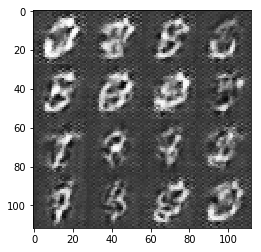

Epoch 1/2 Batch# 810... Discriminator Loss: 0.1265... Generator Loss: 2.4994
Epoch 1/2 Batch# 820... Discriminator Loss: 0.0046... Generator Loss: 7.2015
Epoch 1/2 Batch# 830... Discriminator Loss: 0.0546... Generator Loss: 10.7170
Epoch 1/2 Batch# 840... Discriminator Loss: 0.0562... Generator Loss: 4.6863
Epoch 1/2 Batch# 850... Discriminator Loss: 0.2310... Generator Loss: 2.0547
Epoch 1/2 Batch# 860... Discriminator Loss: 0.0961... Generator Loss: 3.1086
Epoch 1/2 Batch# 870... Discriminator Loss: 0.0180... Generator Loss: 6.0216
Epoch 1/2 Batch# 880... Discriminator Loss: 0.1273... Generator Loss: 12.9701
Epoch 1/2 Batch# 890... Discriminator Loss: 0.0166... Generator Loss: 5.8538
Epoch 1/2 Batch# 900... Discriminator Loss: 0.0640... Generator Loss: 3.5512


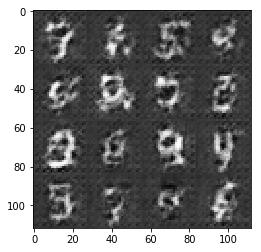

Epoch 1/2 Batch# 910... Discriminator Loss: 0.0256... Generator Loss: 4.5036
Epoch 1/2 Batch# 920... Discriminator Loss: 0.0098... Generator Loss: 5.5737
Epoch 1/2 Batch# 930... Discriminator Loss: 0.0080... Generator Loss: 5.8472
Epoch 2/2 Batch# 940... Discriminator Loss: 0.0039... Generator Loss: 6.9983
Epoch 2/2 Batch# 950... Discriminator Loss: 0.0142... Generator Loss: 10.9437
Epoch 2/2 Batch# 960... Discriminator Loss: 0.0141... Generator Loss: 9.8669
Epoch 2/2 Batch# 970... Discriminator Loss: 0.0214... Generator Loss: 7.3997
Epoch 2/2 Batch# 980... Discriminator Loss: 0.1066... Generator Loss: 3.0360
Epoch 2/2 Batch# 990... Discriminator Loss: 0.0070... Generator Loss: 7.6648
Epoch 2/2 Batch# 1000... Discriminator Loss: 0.0163... Generator Loss: 10.1675


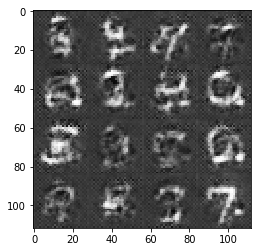

Epoch 2/2 Batch# 1010... Discriminator Loss: 0.1580... Generator Loss: 2.5485
Epoch 2/2 Batch# 1020... Discriminator Loss: 0.0040... Generator Loss: 14.8121
Epoch 2/2 Batch# 1030... Discriminator Loss: 0.0022... Generator Loss: 12.4607
Epoch 2/2 Batch# 1040... Discriminator Loss: 0.0031... Generator Loss: 10.7058
Epoch 2/2 Batch# 1050... Discriminator Loss: 0.1217... Generator Loss: 2.6374
Epoch 2/2 Batch# 1060... Discriminator Loss: 0.0065... Generator Loss: 10.0143
Epoch 2/2 Batch# 1070... Discriminator Loss: 0.0096... Generator Loss: 9.5006
Epoch 2/2 Batch# 1080... Discriminator Loss: 0.0540... Generator Loss: 3.4459
Epoch 2/2 Batch# 1090... Discriminator Loss: 0.6281... Generator Loss: 11.8487
Epoch 2/2 Batch# 1100... Discriminator Loss: 1.1165... Generator Loss: 0.8335


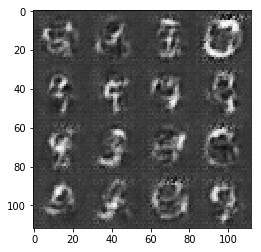

Epoch 2/2 Batch# 1110... Discriminator Loss: 0.4228... Generator Loss: 1.6647
Epoch 2/2 Batch# 1120... Discriminator Loss: 0.9797... Generator Loss: 0.6400
Epoch 2/2 Batch# 1130... Discriminator Loss: 0.3781... Generator Loss: 1.5252
Epoch 2/2 Batch# 1140... Discriminator Loss: 0.1886... Generator Loss: 2.7336
Epoch 2/2 Batch# 1150... Discriminator Loss: 0.3310... Generator Loss: 1.6925
Epoch 2/2 Batch# 1160... Discriminator Loss: 0.2670... Generator Loss: 1.8280
Epoch 2/2 Batch# 1170... Discriminator Loss: 0.1583... Generator Loss: 2.4957
Epoch 2/2 Batch# 1180... Discriminator Loss: 0.3090... Generator Loss: 1.6982
Epoch 2/2 Batch# 1190... Discriminator Loss: 0.2235... Generator Loss: 2.0182
Epoch 2/2 Batch# 1200... Discriminator Loss: 0.1051... Generator Loss: 2.7039


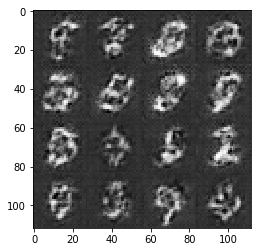

Epoch 2/2 Batch# 1210... Discriminator Loss: 0.1191... Generator Loss: 2.9178
Epoch 2/2 Batch# 1220... Discriminator Loss: 0.0818... Generator Loss: 2.9664
Epoch 2/2 Batch# 1230... Discriminator Loss: 0.1140... Generator Loss: 2.7776
Epoch 2/2 Batch# 1240... Discriminator Loss: 0.1216... Generator Loss: 2.5239
Epoch 2/2 Batch# 1250... Discriminator Loss: 0.1062... Generator Loss: 2.8567
Epoch 2/2 Batch# 1260... Discriminator Loss: 0.1196... Generator Loss: 2.4938
Epoch 2/2 Batch# 1270... Discriminator Loss: 0.1039... Generator Loss: 2.6274
Epoch 2/2 Batch# 1280... Discriminator Loss: 0.0775... Generator Loss: 3.1181
Epoch 2/2 Batch# 1290... Discriminator Loss: 0.0181... Generator Loss: 5.0521
Epoch 2/2 Batch# 1300... Discriminator Loss: 0.0540... Generator Loss: 3.6285


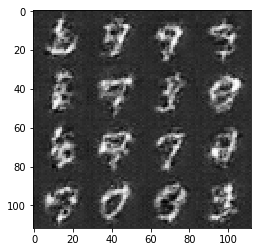

Epoch 2/2 Batch# 1310... Discriminator Loss: 0.0518... Generator Loss: 3.6985
Epoch 2/2 Batch# 1320... Discriminator Loss: 0.0239... Generator Loss: 4.1942
Epoch 2/2 Batch# 1330... Discriminator Loss: 0.0158... Generator Loss: 5.0756
Epoch 2/2 Batch# 1340... Discriminator Loss: 0.0591... Generator Loss: 3.3499
Epoch 2/2 Batch# 1350... Discriminator Loss: 0.0840... Generator Loss: 3.0187
Epoch 2/2 Batch# 1360... Discriminator Loss: 0.0184... Generator Loss: 4.7028
Epoch 2/2 Batch# 1370... Discriminator Loss: 0.0206... Generator Loss: 5.3431
Epoch 2/2 Batch# 1380... Discriminator Loss: 0.0147... Generator Loss: 5.3437
Epoch 2/2 Batch# 1390... Discriminator Loss: 0.1371... Generator Loss: 2.4898
Epoch 2/2 Batch# 1400... Discriminator Loss: 1.2276... Generator Loss: 0.7008


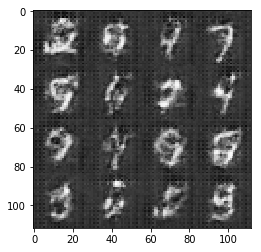

Epoch 2/2 Batch# 1410... Discriminator Loss: 0.1820... Generator Loss: 3.0216
Epoch 2/2 Batch# 1420... Discriminator Loss: 0.5543... Generator Loss: 1.0637
Epoch 2/2 Batch# 1430... Discriminator Loss: 0.3968... Generator Loss: 1.5605
Epoch 2/2 Batch# 1440... Discriminator Loss: 0.3926... Generator Loss: 1.5040
Epoch 2/2 Batch# 1450... Discriminator Loss: 0.1878... Generator Loss: 2.5758
Epoch 2/2 Batch# 1460... Discriminator Loss: 0.1257... Generator Loss: 2.7151
Epoch 2/2 Batch# 1470... Discriminator Loss: 0.0474... Generator Loss: 4.0881
Epoch 2/2 Batch# 1480... Discriminator Loss: 0.0559... Generator Loss: 3.7842
Epoch 2/2 Batch# 1490... Discriminator Loss: 0.1223... Generator Loss: 2.7596
Epoch 2/2 Batch# 1500... Discriminator Loss: 0.0265... Generator Loss: 4.2342


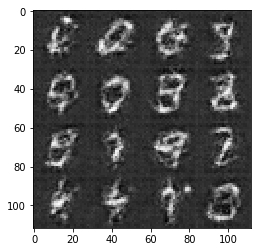

Epoch 2/2 Batch# 1510... Discriminator Loss: 0.1364... Generator Loss: 2.4055
Epoch 2/2 Batch# 1520... Discriminator Loss: 0.0357... Generator Loss: 4.1381
Epoch 2/2 Batch# 1530... Discriminator Loss: 0.0282... Generator Loss: 4.3415
Epoch 2/2 Batch# 1540... Discriminator Loss: 0.0500... Generator Loss: 3.6771
Epoch 2/2 Batch# 1550... Discriminator Loss: 0.0945... Generator Loss: 3.0104
Epoch 2/2 Batch# 1560... Discriminator Loss: 0.0867... Generator Loss: 2.9948
Epoch 2/2 Batch# 1570... Discriminator Loss: 0.0104... Generator Loss: 5.8970
Epoch 2/2 Batch# 1580... Discriminator Loss: 0.0450... Generator Loss: 3.6295
Epoch 2/2 Batch# 1590... Discriminator Loss: 0.0275... Generator Loss: 4.3127
Epoch 2/2 Batch# 1600... Discriminator Loss: 0.0415... Generator Loss: 3.7773


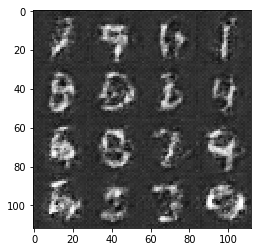

Epoch 2/2 Batch# 1610... Discriminator Loss: 0.0181... Generator Loss: 5.2091
Epoch 2/2 Batch# 1620... Discriminator Loss: 0.0237... Generator Loss: 4.5969
Epoch 2/2 Batch# 1630... Discriminator Loss: 0.0079... Generator Loss: 5.9960
Epoch 2/2 Batch# 1640... Discriminator Loss: 0.0202... Generator Loss: 4.6728
Epoch 2/2 Batch# 1650... Discriminator Loss: 0.0089... Generator Loss: 5.9603
Epoch 2/2 Batch# 1660... Discriminator Loss: 0.0093... Generator Loss: 6.3984
Epoch 2/2 Batch# 1670... Discriminator Loss: 0.0064... Generator Loss: 7.8755
Epoch 2/2 Batch# 1680... Discriminator Loss: 0.0045... Generator Loss: 6.6455
Epoch 2/2 Batch# 1690... Discriminator Loss: 0.0108... Generator Loss: 6.1157
Epoch 2/2 Batch# 1700... Discriminator Loss: 0.0067... Generator Loss: 5.6622


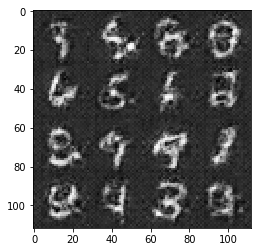

Epoch 2/2 Batch# 1710... Discriminator Loss: 0.0060... Generator Loss: 7.3586
Epoch 2/2 Batch# 1720... Discriminator Loss: 0.0084... Generator Loss: 5.6236
Epoch 2/2 Batch# 1730... Discriminator Loss: 0.0026... Generator Loss: 8.7571
Epoch 2/2 Batch# 1740... Discriminator Loss: 0.0046... Generator Loss: 6.5082
Epoch 2/2 Batch# 1750... Discriminator Loss: 0.0082... Generator Loss: 5.7666
Epoch 2/2 Batch# 1760... Discriminator Loss: 0.0034... Generator Loss: 6.4514
Epoch 2/2 Batch# 1770... Discriminator Loss: 0.0031... Generator Loss: 7.6707
Epoch 2/2 Batch# 1780... Discriminator Loss: 0.0022... Generator Loss: 8.3071
Epoch 2/2 Batch# 1790... Discriminator Loss: 0.0272... Generator Loss: 4.1811
Epoch 2/2 Batch# 1800... Discriminator Loss: 0.0023... Generator Loss: 7.3320


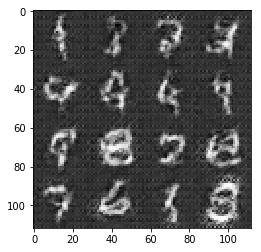

Epoch 2/2 Batch# 1810... Discriminator Loss: 0.0015... Generator Loss: 8.2367
Epoch 2/2 Batch# 1820... Discriminator Loss: 0.0138... Generator Loss: 5.0741
Epoch 2/2 Batch# 1830... Discriminator Loss: 0.0178... Generator Loss: 4.6853
Epoch 2/2 Batch# 1840... Discriminator Loss: 1.3270... Generator Loss: 3.8035
Epoch 2/2 Batch# 1850... Discriminator Loss: 0.2985... Generator Loss: 2.8628
Epoch 2/2 Batch# 1860... Discriminator Loss: 0.3214... Generator Loss: 1.7057
Epoch 2/2 Batch# 1870... Discriminator Loss: 0.1907... Generator Loss: 2.3100


IndexError: list index out of range

In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 Batch# 10... Discriminator Loss: 0.0269... Generator Loss: 9.2014
Epoch 1/1 Batch# 20... Discriminator Loss: 0.0211... Generator Loss: 4.8391
Epoch 1/1 Batch# 30... Discriminator Loss: 0.2673... Generator Loss: 37.2325
Epoch 1/1 Batch# 40... Discriminator Loss: 0.0875... Generator Loss: 3.8400
Epoch 1/1 Batch# 50... Discriminator Loss: 2.0059... Generator Loss: 0.4389
Epoch 1/1 Batch# 60... Discriminator Loss: 0.2405... Generator Loss: 34.1111
Epoch 1/1 Batch# 70... Discriminator Loss: 0.1113... Generator Loss: 25.4562
Epoch 1/1 Batch# 80... Discriminator Loss: 3.8449... Generator Loss: 0.1587
Epoch 1/1 Batch# 90... Discriminator Loss: 3.1368... Generator Loss: 10.4770
Epoch 1/1 Batch# 100... Discriminator Loss: 0.1981... Generator Loss: 2.8698


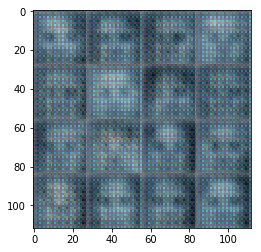

Epoch 1/1 Batch# 110... Discriminator Loss: 0.0571... Generator Loss: 6.5617
Epoch 1/1 Batch# 120... Discriminator Loss: 0.1347... Generator Loss: 2.8651
Epoch 1/1 Batch# 130... Discriminator Loss: 0.2857... Generator Loss: 2.3659
Epoch 1/1 Batch# 140... Discriminator Loss: 0.1506... Generator Loss: 3.1417
Epoch 1/1 Batch# 150... Discriminator Loss: 0.2045... Generator Loss: 2.3866
Epoch 1/1 Batch# 160... Discriminator Loss: 0.1547... Generator Loss: 7.7242
Epoch 1/1 Batch# 170... Discriminator Loss: 0.0204... Generator Loss: 10.0341
Epoch 1/1 Batch# 180... Discriminator Loss: 0.4274... Generator Loss: 11.8549
Epoch 1/1 Batch# 190... Discriminator Loss: 0.0054... Generator Loss: 8.1355
Epoch 1/1 Batch# 200... Discriminator Loss: 0.0094... Generator Loss: 8.9665


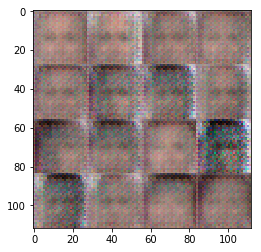

Epoch 1/1 Batch# 210... Discriminator Loss: 0.0101... Generator Loss: 11.0829
Epoch 1/1 Batch# 220... Discriminator Loss: 0.0793... Generator Loss: 8.2082
Epoch 1/1 Batch# 230... Discriminator Loss: 0.0084... Generator Loss: 7.1907
Epoch 1/1 Batch# 240... Discriminator Loss: 8.3366... Generator Loss: 0.0285
Epoch 1/1 Batch# 250... Discriminator Loss: 2.7797... Generator Loss: 7.5787
Epoch 1/1 Batch# 260... Discriminator Loss: 0.0015... Generator Loss: 11.3101
Epoch 1/1 Batch# 270... Discriminator Loss: 0.0227... Generator Loss: 10.8579
Epoch 1/1 Batch# 280... Discriminator Loss: 0.0255... Generator Loss: 14.5964
Epoch 1/1 Batch# 290... Discriminator Loss: 0.0043... Generator Loss: 9.6967
Epoch 1/1 Batch# 300... Discriminator Loss: 10.2825... Generator Loss: 16.0715


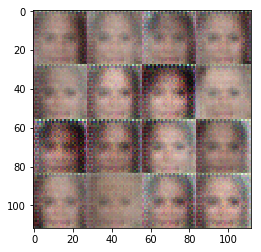

Epoch 1/1 Batch# 310... Discriminator Loss: 0.5884... Generator Loss: 4.1365
Epoch 1/1 Batch# 320... Discriminator Loss: 0.2447... Generator Loss: 2.0050
Epoch 1/1 Batch# 330... Discriminator Loss: 0.0416... Generator Loss: 3.7391
Epoch 1/1 Batch# 340... Discriminator Loss: 0.6342... Generator Loss: 4.2763
Epoch 1/1 Batch# 350... Discriminator Loss: 0.0183... Generator Loss: 8.4525
Epoch 1/1 Batch# 360... Discriminator Loss: 0.0379... Generator Loss: 4.4899
Epoch 1/1 Batch# 370... Discriminator Loss: 1.7423... Generator Loss: 11.7470
Epoch 1/1 Batch# 380... Discriminator Loss: 0.7820... Generator Loss: 5.1567
Epoch 1/1 Batch# 390... Discriminator Loss: 0.1312... Generator Loss: 7.3202
Epoch 1/1 Batch# 400... Discriminator Loss: 0.0395... Generator Loss: 10.7680


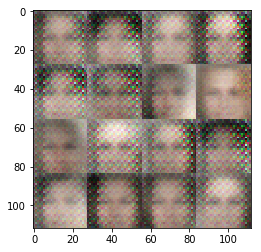

Epoch 1/1 Batch# 410... Discriminator Loss: 0.0262... Generator Loss: 6.2301
Epoch 1/1 Batch# 420... Discriminator Loss: 2.5209... Generator Loss: 5.6052
Epoch 1/1 Batch# 430... Discriminator Loss: 0.1620... Generator Loss: 7.2529
Epoch 1/1 Batch# 440... Discriminator Loss: 0.0242... Generator Loss: 12.7764
Epoch 1/1 Batch# 450... Discriminator Loss: 0.6537... Generator Loss: 0.9549
Epoch 1/1 Batch# 460... Discriminator Loss: 0.0976... Generator Loss: 7.7842
Epoch 1/1 Batch# 470... Discriminator Loss: 0.0392... Generator Loss: 5.8272
Epoch 1/1 Batch# 480... Discriminator Loss: 0.0411... Generator Loss: 3.5438
Epoch 1/1 Batch# 490... Discriminator Loss: 0.0227... Generator Loss: 6.6259
Epoch 1/1 Batch# 500... Discriminator Loss: 0.3113... Generator Loss: 5.4820


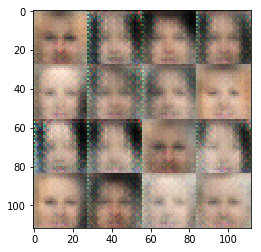

Epoch 1/1 Batch# 510... Discriminator Loss: 0.1215... Generator Loss: 2.7782
Epoch 1/1 Batch# 520... Discriminator Loss: 0.0079... Generator Loss: 6.7717
Epoch 1/1 Batch# 530... Discriminator Loss: 0.0081... Generator Loss: 6.7488
Epoch 1/1 Batch# 540... Discriminator Loss: 0.0030... Generator Loss: 7.1493
Epoch 1/1 Batch# 550... Discriminator Loss: 0.0164... Generator Loss: 5.3542
Epoch 1/1 Batch# 560... Discriminator Loss: 6.4154... Generator Loss: 0.0042
Epoch 1/1 Batch# 570... Discriminator Loss: 1.2336... Generator Loss: 0.8004
Epoch 1/1 Batch# 580... Discriminator Loss: 0.1402... Generator Loss: 4.4488
Epoch 1/1 Batch# 590... Discriminator Loss: 0.0599... Generator Loss: 4.4367
Epoch 1/1 Batch# 600... Discriminator Loss: 1.3095... Generator Loss: 0.4214


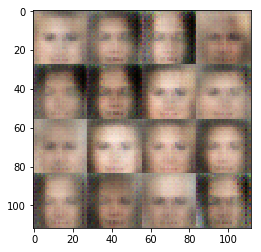

Epoch 1/1 Batch# 610... Discriminator Loss: 0.1757... Generator Loss: 2.6398
Epoch 1/1 Batch# 620... Discriminator Loss: 0.0703... Generator Loss: 8.4241
Epoch 1/1 Batch# 630... Discriminator Loss: 0.0170... Generator Loss: 6.5627
Epoch 1/1 Batch# 640... Discriminator Loss: 0.0642... Generator Loss: 4.5499
Epoch 1/1 Batch# 650... Discriminator Loss: 0.0394... Generator Loss: 7.1353
Epoch 1/1 Batch# 660... Discriminator Loss: 0.0272... Generator Loss: 4.9095
Epoch 1/1 Batch# 670... Discriminator Loss: 0.0188... Generator Loss: 4.4948
Epoch 1/1 Batch# 680... Discriminator Loss: 0.0169... Generator Loss: 9.8607
Epoch 1/1 Batch# 690... Discriminator Loss: 0.3641... Generator Loss: 1.5657
Epoch 1/1 Batch# 700... Discriminator Loss: 0.0035... Generator Loss: 8.2882


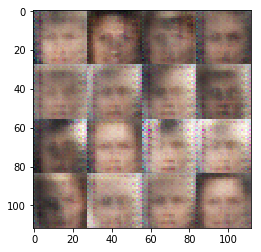

Epoch 1/1 Batch# 710... Discriminator Loss: 0.0056... Generator Loss: 9.7532
Epoch 1/1 Batch# 720... Discriminator Loss: 0.0068... Generator Loss: 11.9385
Epoch 1/1 Batch# 730... Discriminator Loss: 0.0017... Generator Loss: 9.4014
Epoch 1/1 Batch# 740... Discriminator Loss: 0.0552... Generator Loss: 5.4013
Epoch 1/1 Batch# 750... Discriminator Loss: 0.0061... Generator Loss: 7.5220
Epoch 1/1 Batch# 760... Discriminator Loss: 0.0024... Generator Loss: 11.9027
Epoch 1/1 Batch# 770... Discriminator Loss: 0.0112... Generator Loss: 5.3695
Epoch 1/1 Batch# 780... Discriminator Loss: 0.0025... Generator Loss: 12.6493
Epoch 1/1 Batch# 790... Discriminator Loss: 0.0054... Generator Loss: 6.3733
Epoch 1/1 Batch# 800... Discriminator Loss: 0.0017... Generator Loss: 9.3032


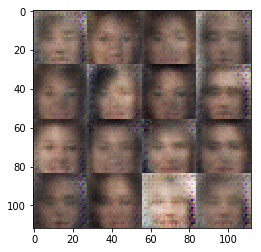

Epoch 1/1 Batch# 810... Discriminator Loss: 1.0455... Generator Loss: 14.7789
Epoch 1/1 Batch# 820... Discriminator Loss: 0.1319... Generator Loss: 4.0141
Epoch 1/1 Batch# 830... Discriminator Loss: 0.3706... Generator Loss: 1.5760
Epoch 1/1 Batch# 840... Discriminator Loss: 0.0582... Generator Loss: 3.2750
Epoch 1/1 Batch# 850... Discriminator Loss: 0.0182... Generator Loss: 4.7890
Epoch 1/1 Batch# 860... Discriminator Loss: 0.0571... Generator Loss: 4.9819
Epoch 1/1 Batch# 870... Discriminator Loss: 0.0566... Generator Loss: 3.9365
Epoch 1/1 Batch# 880... Discriminator Loss: 0.0018... Generator Loss: 10.2753
Epoch 1/1 Batch# 890... Discriminator Loss: 0.0016... Generator Loss: 11.5826
Epoch 1/1 Batch# 900... Discriminator Loss: 0.1056... Generator Loss: 3.0080


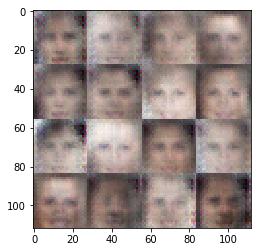

Epoch 1/1 Batch# 910... Discriminator Loss: 0.0065... Generator Loss: 9.4948
Epoch 1/1 Batch# 920... Discriminator Loss: 0.0079... Generator Loss: 6.7993
Epoch 1/1 Batch# 930... Discriminator Loss: 0.0084... Generator Loss: 11.2691
Epoch 1/1 Batch# 940... Discriminator Loss: 0.0041... Generator Loss: 7.1225
Epoch 1/1 Batch# 950... Discriminator Loss: 1.3292... Generator Loss: 0.6097
Epoch 1/1 Batch# 960... Discriminator Loss: 1.2026... Generator Loss: 0.7208
Epoch 1/1 Batch# 970... Discriminator Loss: 0.0672... Generator Loss: 8.2035
Epoch 1/1 Batch# 980... Discriminator Loss: 0.1539... Generator Loss: 4.5809
Epoch 1/1 Batch# 990... Discriminator Loss: 0.0053... Generator Loss: 9.8872
Epoch 1/1 Batch# 1000... Discriminator Loss: 0.0405... Generator Loss: 4.9502


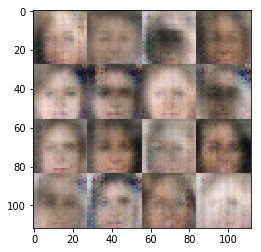

Epoch 1/1 Batch# 1010... Discriminator Loss: 0.0365... Generator Loss: 4.3900
Epoch 1/1 Batch# 1020... Discriminator Loss: 0.0115... Generator Loss: 12.6315
Epoch 1/1 Batch# 1030... Discriminator Loss: 0.0023... Generator Loss: 10.2001
Epoch 1/1 Batch# 1040... Discriminator Loss: 0.0105... Generator Loss: 6.2535
Epoch 1/1 Batch# 1050... Discriminator Loss: 0.0096... Generator Loss: 11.1651
Epoch 1/1 Batch# 1060... Discriminator Loss: 0.0387... Generator Loss: 4.0635
Epoch 1/1 Batch# 1070... Discriminator Loss: 0.0051... Generator Loss: 12.5641
Epoch 1/1 Batch# 1080... Discriminator Loss: 0.0156... Generator Loss: 5.5446
Epoch 1/1 Batch# 1090... Discriminator Loss: 0.0042... Generator Loss: 10.2684
Epoch 1/1 Batch# 1100... Discriminator Loss: 0.0045... Generator Loss: 7.6597


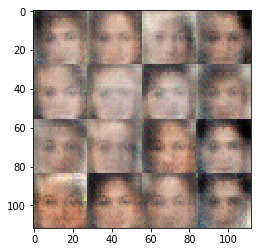

Epoch 1/1 Batch# 1110... Discriminator Loss: 0.0067... Generator Loss: 15.4561
Epoch 1/1 Batch# 1120... Discriminator Loss: 0.0028... Generator Loss: 12.4057
Epoch 1/1 Batch# 1130... Discriminator Loss: 0.0008... Generator Loss: 12.1202
Epoch 1/1 Batch# 1140... Discriminator Loss: 0.0428... Generator Loss: 7.7075
Epoch 1/1 Batch# 1150... Discriminator Loss: 0.0137... Generator Loss: 6.5482
Epoch 1/1 Batch# 1160... Discriminator Loss: 0.1862... Generator Loss: 16.5657
Epoch 1/1 Batch# 1170... Discriminator Loss: 0.0754... Generator Loss: 4.1807
Epoch 1/1 Batch# 1180... Discriminator Loss: 0.0246... Generator Loss: 4.6143
Epoch 1/1 Batch# 1190... Discriminator Loss: 0.0050... Generator Loss: 14.5847
Epoch 1/1 Batch# 1200... Discriminator Loss: 0.0535... Generator Loss: 3.7142


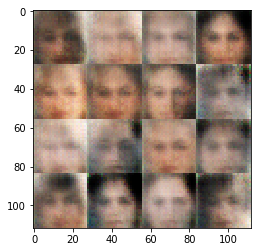

Epoch 1/1 Batch# 1210... Discriminator Loss: 0.0020... Generator Loss: 8.3311
Epoch 1/1 Batch# 1220... Discriminator Loss: 0.0533... Generator Loss: 4.2186
Epoch 1/1 Batch# 1230... Discriminator Loss: 0.0554... Generator Loss: 5.0286
Epoch 1/1 Batch# 1240... Discriminator Loss: 0.0090... Generator Loss: 9.1935
Epoch 1/1 Batch# 1250... Discriminator Loss: 0.3583... Generator Loss: 1.6803
Epoch 1/1 Batch# 1260... Discriminator Loss: 0.9750... Generator Loss: 10.5811
Epoch 1/1 Batch# 1270... Discriminator Loss: 0.0707... Generator Loss: 3.9385
Epoch 1/1 Batch# 1280... Discriminator Loss: 0.0019... Generator Loss: 10.8794
Epoch 1/1 Batch# 1290... Discriminator Loss: 0.0059... Generator Loss: 6.4271
Epoch 1/1 Batch# 1300... Discriminator Loss: 0.0455... Generator Loss: 6.7626


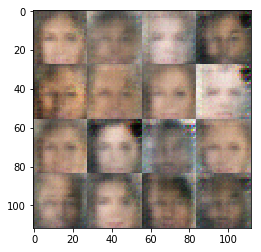

Epoch 1/1 Batch# 1310... Discriminator Loss: 0.0035... Generator Loss: 9.6699
Epoch 1/1 Batch# 1320... Discriminator Loss: 0.0207... Generator Loss: 7.0588
Epoch 1/1 Batch# 1330... Discriminator Loss: 0.0043... Generator Loss: 8.3868
Epoch 1/1 Batch# 1340... Discriminator Loss: 0.0020... Generator Loss: 10.4638
Epoch 1/1 Batch# 1350... Discriminator Loss: 0.6456... Generator Loss: 14.3515
Epoch 1/1 Batch# 1360... Discriminator Loss: 0.0085... Generator Loss: 10.5439
Epoch 1/1 Batch# 1370... Discriminator Loss: 0.0058... Generator Loss: 13.9178
Epoch 1/1 Batch# 1380... Discriminator Loss: 0.0013... Generator Loss: 11.2631
Epoch 1/1 Batch# 1390... Discriminator Loss: 0.0057... Generator Loss: 9.1570
Epoch 1/1 Batch# 1400... Discriminator Loss: 1.1134... Generator Loss: 0.5786


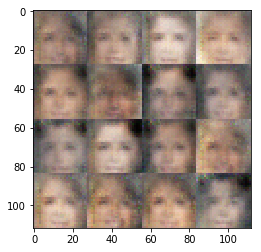

Epoch 1/1 Batch# 1410... Discriminator Loss: 0.1847... Generator Loss: 4.1319
Epoch 1/1 Batch# 1420... Discriminator Loss: 0.0084... Generator Loss: 11.2331
Epoch 1/1 Batch# 1430... Discriminator Loss: 0.0413... Generator Loss: 4.4866
Epoch 1/1 Batch# 1440... Discriminator Loss: 0.0030... Generator Loss: 10.3602
Epoch 1/1 Batch# 1450... Discriminator Loss: 0.0265... Generator Loss: 4.6980
Epoch 1/1 Batch# 1460... Discriminator Loss: 0.0473... Generator Loss: 3.8396
Epoch 1/1 Batch# 1470... Discriminator Loss: 0.0115... Generator Loss: 7.5219
Epoch 1/1 Batch# 1480... Discriminator Loss: 0.0021... Generator Loss: 14.3951
Epoch 1/1 Batch# 1490... Discriminator Loss: 0.0062... Generator Loss: 11.7741
Epoch 1/1 Batch# 1500... Discriminator Loss: 0.0753... Generator Loss: 9.0356


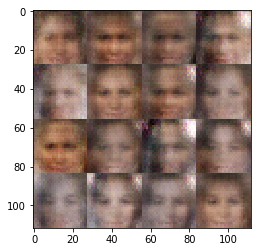

Epoch 1/1 Batch# 1510... Discriminator Loss: 0.0962... Generator Loss: 3.4262
Epoch 1/1 Batch# 1520... Discriminator Loss: 0.2026... Generator Loss: 2.3279
Epoch 1/1 Batch# 1530... Discriminator Loss: 0.0424... Generator Loss: 3.8235
Epoch 1/1 Batch# 1540... Discriminator Loss: 0.0071... Generator Loss: 14.8508
Epoch 1/1 Batch# 1550... Discriminator Loss: 0.0131... Generator Loss: 13.6297
Epoch 1/1 Batch# 1560... Discriminator Loss: 0.0021... Generator Loss: 7.2956
Epoch 1/1 Batch# 1570... Discriminator Loss: 0.0007... Generator Loss: 11.2192


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.